# Let's build a model! 

We'll use a data set that is standard in scikit-learn.  

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()

This will give us a description of what's in this data set. 

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

So let's get the data into a pandas DataFrame (X) and a Series (y).  

In [4]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y = data['target']
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

A tiny bit of exploratory data analysis.  Let's draw a plot of MedInc vs. Average Price.  

In [6]:
import matplotlib.pyplot as plt

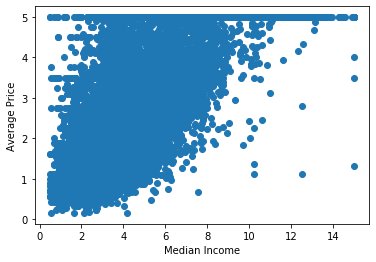

In [7]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('Average Price')
plt.show()

In [8]:
print(y.min(), y.max())

0.14999 5.00001


The data set is a little strange, as the Average Price is clearly capped at 5.  What can we do?  We dont' know why, so let's just continue with what we want to do, build a model (or several models) to try to predict the Average Value using other features in the data set. 

We want to build a model such as the following one:  
    ave price = a*(median income) + b 

What is a and b?  What values of a and b will give me a "good" fit to this data?  

The idea is to find these values of a and b, and then we can use this to predict other house prices given the median income of other neighborhoods.  

In [9]:
from sklearn.linear_model import LinearRegression

Linear regression is usually a good "benchmark" to first consider as it's easy to fit a model, and gives us a "first effort" to compare other models against. 

In [10]:
lr = LinearRegression()

lr.fit(X['MedInc'].values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

This cell below has the same outcome as the previous one.  The main thing to keep in mind is that the feature matrix needs to be given to scikit-learn in the proper format, namely a two-dimensional "array".  Rows correspond to observations, columns correspond to features of our data.  In this example there is only one feature.  

Scikit-learn can use numpy arrays, lists of lists, or pandas DataFrames.  The previous cell got the data in the form of a numpy array.  The cell below gives the data in the form of a DataFrame.  (Remember that uses double brackets will return a DataFrame!) 

In [11]:
lr.fit(X[['MedInc']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can get the coefficient and intercept of this model.  In terms of "a" and "b" used before, "a" is the coefficient, and "b" is the intercept.  The coefficients are a numpy array, but there is only one element in this numpy array for this model as there is only a single feature. 

In [12]:
print(f'Coefficient: {lr.coef_[0]}')
print(f'Intercept: {lr.intercept_}')

Coefficient: 0.41793849201896277
Intercept: 0.45085576703267893


Every predictor in scikit-learn has a `predict` method to get predictions.  There is also a `score` function.  For a regressor object (such as `LinearRegression`) this gives us the so-called "R-squared" value.  

In [13]:
lr.score(X[['MedInc']], y)

0.473447491807199